In [1]:
# 导入常见包
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

In [2]:
# 读取图片
img = cv2.imread('./images/baby.jpg')
img_cvt =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

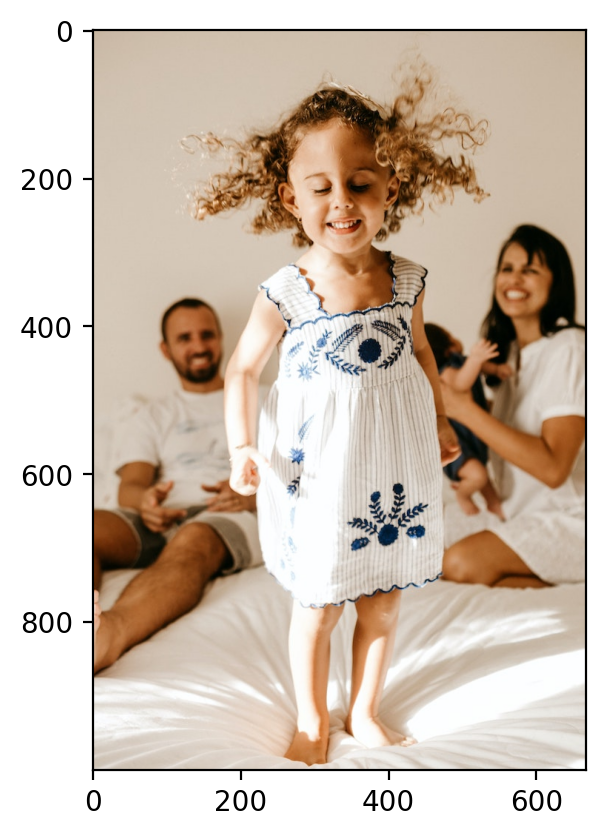

In [3]:
# 显示
plt.imshow(img_cvt)

In [4]:
# 导入pixellib
import pixellib

In [5]:
# 导入实例分割
from pixellib.instance import instance_segmentation

In [6]:
# 实例化
instance =  instance_segmentation()

In [7]:
# 加载模型
instance.load_model('./weights/mask_rcnn_coco.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
# 实例分割
target_classes = instance.select_target_classes(person=True)
results,output = instance.segmentFrame(img.copy(),segment_target_classes=target_classes)

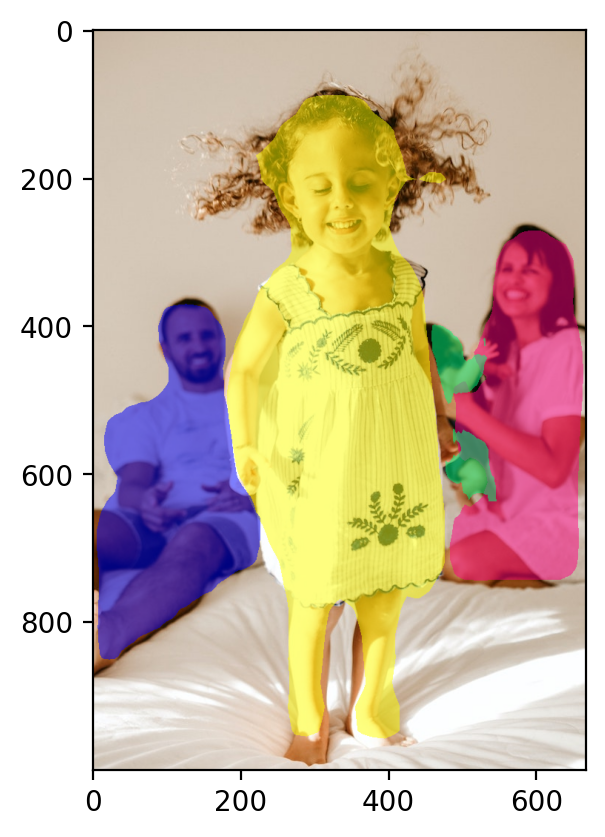

In [9]:
plt.imshow(cv2.cvtColor(output,cv2.COLOR_BGR2RGB))

In [10]:
# 根据实例分割结果构造蒙版
# 构造弹幕文字图片，蒙版处理
# 将弹幕和原图合成

In [11]:
img.shape[:2]

(1000, 667)

In [12]:
# 创建黑色背景图

black_bg = np.zeros((img.shape[:2]))

In [13]:
# black_bg[0:100,0:200]=255

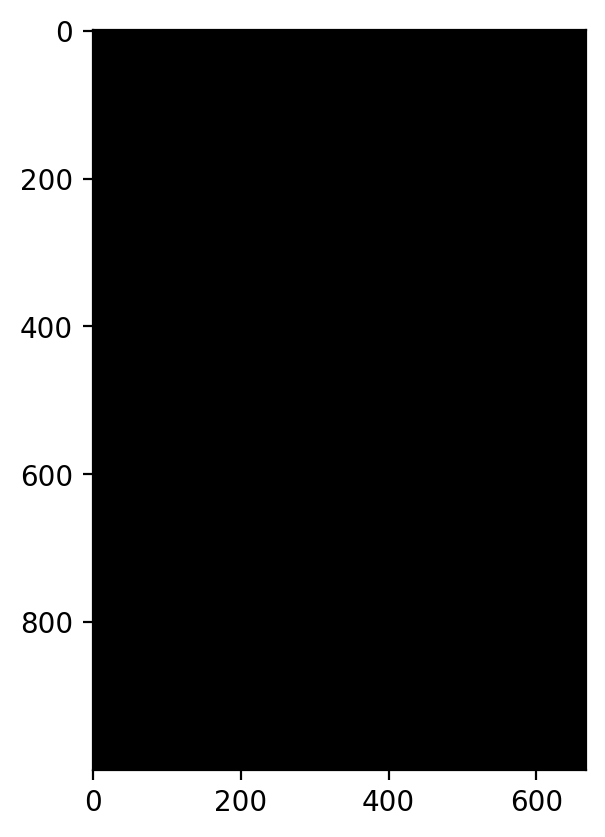

In [14]:
plt.imshow(black_bg,cmap='gray')

In [15]:
person_count = len(results['class_ids'])
masks = results['masks']

In [16]:
masks.shape

(1000, 667, 4)

In [17]:
# 将多个人结果合成一个蒙版
for p_index in range(person_count):
    black_bg = np.where(masks[:,:,p_index]==True,255,black_bg)

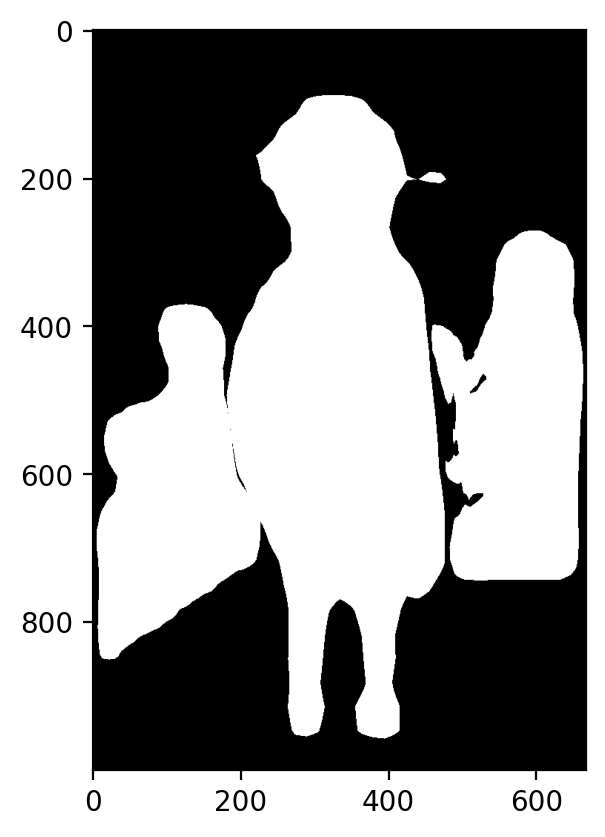

In [18]:
plt.imshow(black_bg,cmap='gray')

In [19]:
# 构造弹幕图片


In [20]:
# 导入PIL
from PIL import Image,ImageDraw,ImageFont

In [21]:
h = img.shape[0]
w = img.shape[1]

In [22]:
# 透明底图
trans_bg = Image.new("RGBA",(w,h),(255,0,255,0))

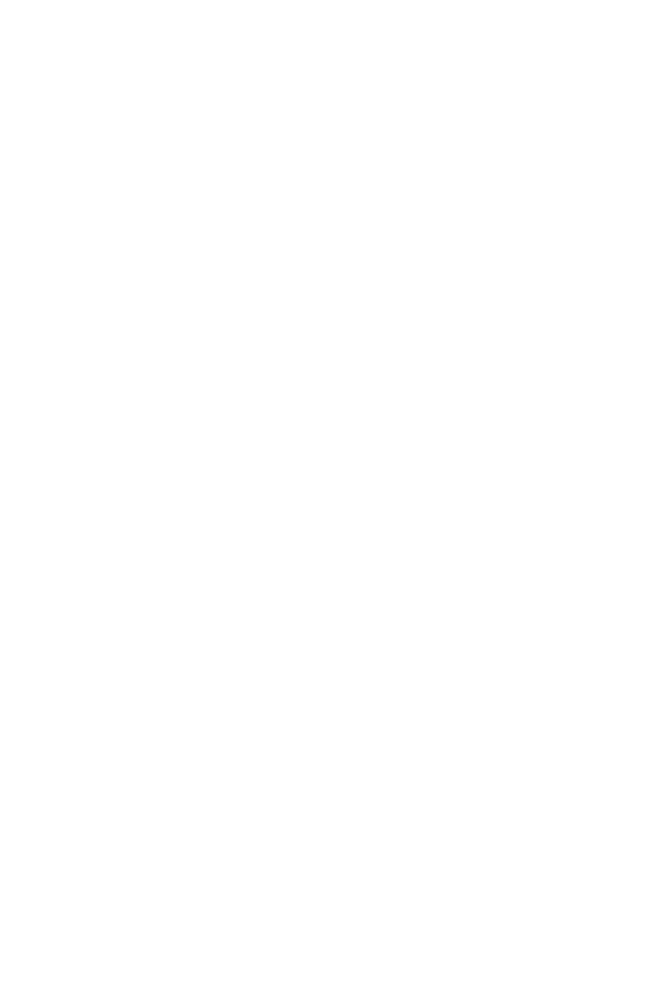

In [24]:
trans_bg

In [25]:
# 绘制
d = ImageDraw.Draw(trans_bg)

In [26]:
font = ImageFont.truetype('./fonts/MSYH.ttc',40,encoding="utf-8")

In [27]:
d.text((-100,10),"计算机视觉计算机视觉计算机视觉计算机视觉计算机视觉",font=font,fill=(255,0,255,255))
d.text((10,80),"计算机视觉计算机视觉计算机视觉计算机视觉计算机视觉",font=font,fill=(255,0,255,255))
d.text((10,150),"计算机视觉计算机视觉计算机视觉计算机视觉计算机视觉",font=font,fill=(255,0,255,255))
d.text((10,220),"计算机视觉计算机视觉计算机视觉计算机视觉计算机视觉",font=font,fill=(255,0,255,255))
d.text((10,290),"计算机视觉计算机视觉计算机视觉计算机视觉计算机视觉",font=font,fill=(255,0,255,255))

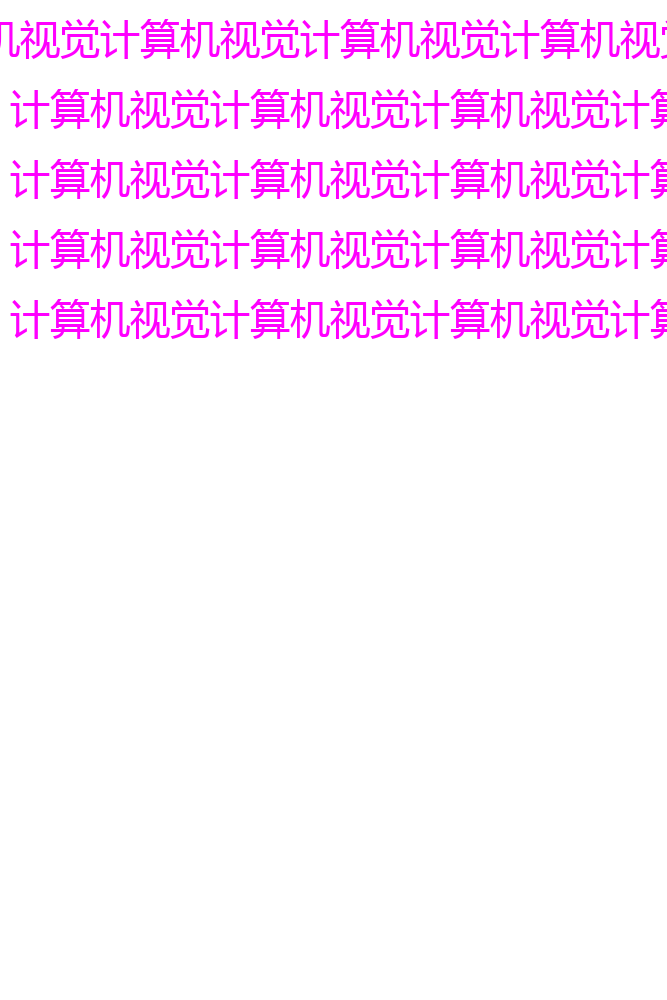

In [28]:
trans_bg

In [29]:
# 将弹幕层图片蒙版处理

In [30]:
trans_bg_np = np.asarray(trans_bg)

In [31]:
trans_bg_np.shape

(1000, 667, 4)

In [32]:
trans_bg_np=trans_bg_np.copy()

In [33]:
# alpha通道设置
trans_bg_np[:,:,3] = np.where(black_bg==255,0,trans_bg_np[:,:,3])

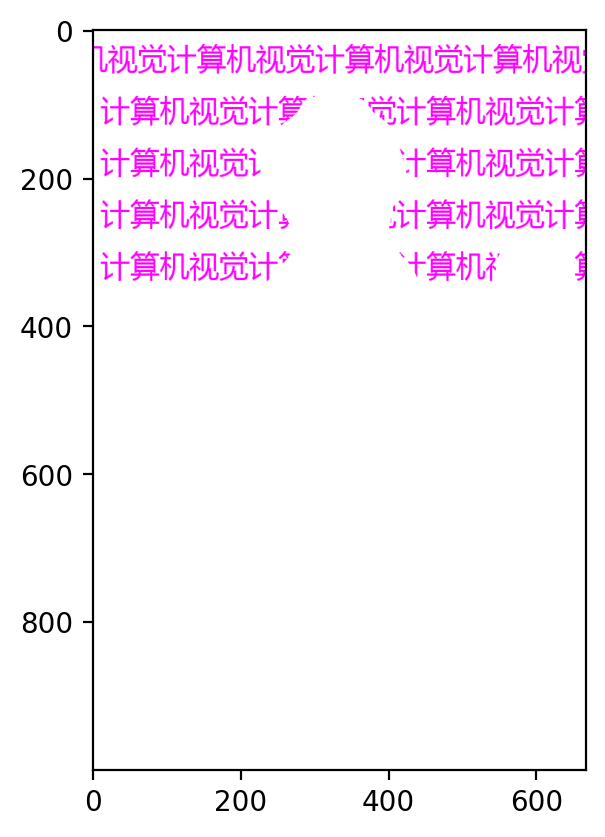

In [34]:
plt.imshow(trans_bg_np)

In [35]:
# 将原图和弹幕图合成一起


In [36]:
# 转为PIL格式
trans_bg_np_pil = Image.fromarray(trans_bg_np)

# 将原图转为RGBA
img_rgba = cv2.cvtColor(img,cv2.COLOR_BGR2RGBA)
img_pil = Image.fromarray(img_rgba)

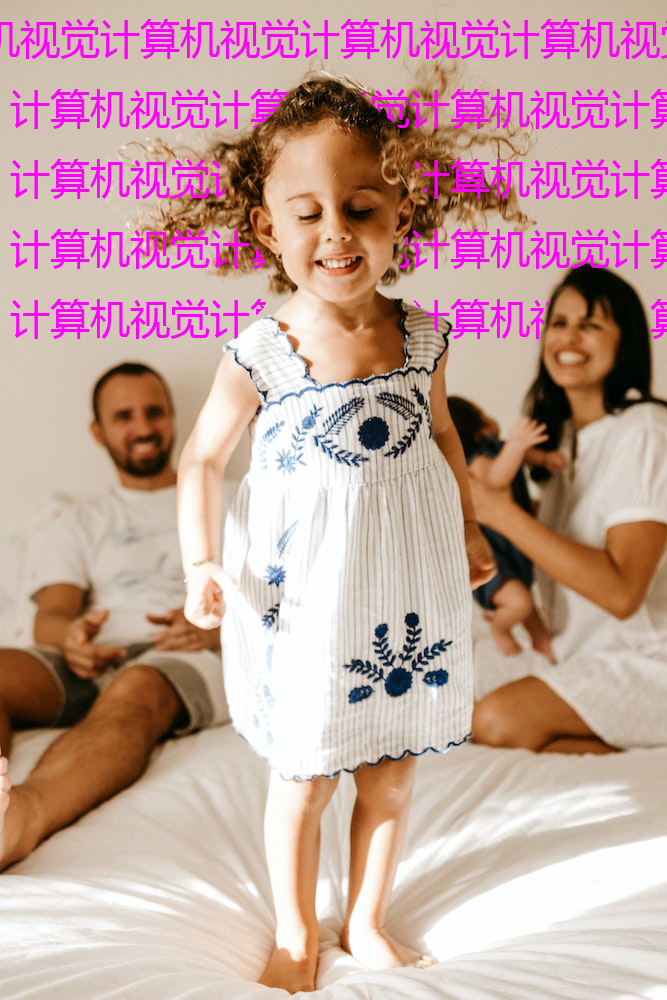

In [37]:
Image.alpha_composite(img_pil,trans_bg_np_pil)